In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from urllib import urlretrieve
import cPickle as pickle
import os
import gzip

import numpy as np
import theano

import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from lasagne.nonlinearities import softmax
import matplotlib.pyplot as plt


from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from nolearn.lasagne import PrintLayerInfo


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.cross_validation import train_test_split
%matplotlib inline

Using gpu device 0: GRID K520 (CNMeM is enabled with initial size: 98.0% of memory, CuDNN not available)
/home/ubuntu/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
Ytr = np.genfromtxt("data/kaggle.Y.train.txt",delimiter=',').astype(np.float32)

In [4]:
Ytr_class = np.asarray([int(round(y)) for y in Ytr]).astype(np.int32)

In [5]:
X2tr = np.load('data/images.npy')

In [38]:
X2tr_reshaped = np.dot(X2tr[...,:3], [0.299, 0.587, 0.114]).reshape(-1,1,32,32).astype(np.float32)  
X2tr_reshaped = (X2tr_reshaped/255.0)-0.5

In [6]:
X2tr = X2tr.reshape(-1, 3, 32, 32).astype(np.float32)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X2tr, Ytr, test_size=.25)

In [8]:
InputLayer = layers.InputLayer
Conv2DLayer = layers.Conv2DLayer
MaxPool2DLayer = layers.MaxPool2DLayer
DenseLayer = layers.DenseLayer
DropoutLayer = layers.DropoutLayer

In [9]:
layers4 = [
    (InputLayer, {'shape': (None, 3, 32, 32)}),

    (Conv2DLayer, {'num_filters': 256, 'filter_size': (3, 3), 'pad': 1}),
    (Conv2DLayer, {'num_filters': 256, 'filter_size': (3, 3), 'pad': 1}),
    (Conv2DLayer, {'num_filters': 256, 'filter_size': (3, 3), 'pad': 1}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),

    (Conv2DLayer, {'num_filters': 256, 'filter_size': (3, 3), 'pad': 1}),
    (Conv2DLayer, {'num_filters': 256, 'filter_size': (3, 3), 'pad': 1}),
    (Conv2DLayer, {'num_filters': 256, 'filter_size': (3, 3), 'pad': 1}),
    (MaxPool2DLayer, {'pool_size': (2, 2)}),
    
    (Conv2DLayer, {'num_filters': 256, 'filter_size': (3, 3), 'pad': 1}),

    (MaxPool2DLayer, {'pool_size': (2, 2)}),
    
    (DropoutLayer, {'p' : 0.2}),
    (DenseLayer, {'num_units': 4096}),
    (DenseLayer, {'num_units': 4096}),

    (DenseLayer, {'num_units': 1, 'nonlinearity': lasagne.nonlinearities.rectify}),
]

In [10]:
net4 = NeuralNet(
    layers=layers4,
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=50,
    verbose=2,
    regression=True,
)

In [11]:
net4.initialize()

/home/ubuntu/anaconda/lib/python2.7/site-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


In [12]:
layer_info = PrintLayerInfo()
layer_info(net4)

# Neural Network with 37114369 learnable parameters

## Layer information

name         size         total    cap.Y    cap.X    cov.Y    cov.X
-----------  ---------  -------  -------  -------  -------  -------
input0       3x32x32       3072   100.00   100.00   100.00   100.00
conv2d1      256x32x32   262144   100.00   100.00     9.38     9.38
conv2d2      256x32x32   262144    60.00    60.00    15.62    15.62
conv2d3      256x32x32   262144    42.86    42.86    21.88    21.88
maxpool2d4   256x16x16    65536    42.86    42.86    21.88    21.88
conv2d5      256x16x16    65536    54.55    54.55    34.38    34.38
conv2d6      256x16x16    65536    40.00    40.00    46.88    46.88
conv2d7      256x16x16    65536    31.58    31.58    59.38    59.38
maxpool2d8   256x8x8      16384    31.58    31.58    59.38    59.38
conv2d9      256x8x8      16384    44.44    44.44    84.38    84.38
maxpool2d10  256x4x4       4096    44.44    44.44    84.38    84.38
dropout11    256x4x4       4096   100.00 

In [13]:
net4.fit(X2tr, Ytr)

# Neural Network with 37114369 learnable parameters

## Layer information

name         size         total    cap.Y    cap.X    cov.Y    cov.X
-----------  ---------  -------  -------  -------  -------  -------
input0       3x32x32       3072   100.00   100.00   100.00   100.00
conv2d1      256x32x32   262144   100.00   100.00     9.38     9.38
conv2d2      256x32x32   262144    60.00    60.00    15.62    15.62
conv2d3      256x32x32   262144    42.86    42.86    21.88    21.88
maxpool2d4   256x16x16    65536    42.86    42.86    21.88    21.88
conv2d5      256x16x16    65536    54.55    54.55    34.38    34.38
conv2d6      256x16x16    65536    40.00    40.00    46.88    46.88
conv2d7      256x16x16    65536    31.58    31.58    59.38    59.38
maxpool2d8   256x8x8      16384    31.58    31.58    59.38    59.38
conv2d9      256x8x8      16384    44.44    44.44    84.38    84.38
maxpool2d10  256x4x4       4096    44.44    44.44    84.38    84.38
dropout11    256x4x4       4096   100.00 

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fc9eee4add0>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fc9eee4ac90>,
     custom_scores=None,
     layers=[(<class 'lasagne.layers.input.InputLayer'>, {'shape': (None, 3, 32, 32)}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': (3, 3), 'pad': 1, 'num_filters': 256}), (<class 'lasagne.layers.conv.Conv2DLayer'>, {'filter_size': (3, 3), 'pad': 1, 'num_filters': 256}), (<class 'lasagne.....layers.dense.DenseLayer'>, {'num_units': 1, 'nonlinearity': <function rectify at 0x7fc9f42582a8>})],
     loss=None, max_epochs=50, more_params={},
     objective=<function objective at 0x7fc9ef914cf8>,
     objective_loss_function=<function squared_error at 0x7fc9efdbfc08>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fc9eebe5ef0>],
     on_training_finished=[],
     on_training_started=[<nolearn.la

In [181]:
y_hat = net4.predict(X2tr)

In [183]:
print(mean_squared_error(Ytr, y_hat))

0.485782


In [193]:
labels = list()
for ind, pred in enumerate(Ytr):
    labels.append((pred, ind))

In [197]:
labels.sort(reverse=True)

In [ ]:
cm = confusion_matrix()

60000


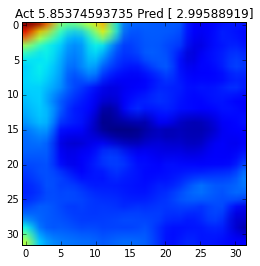

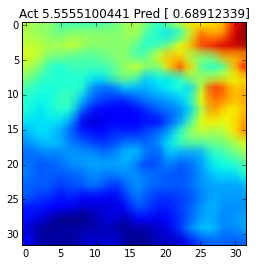

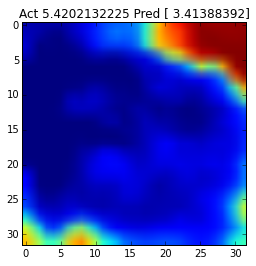

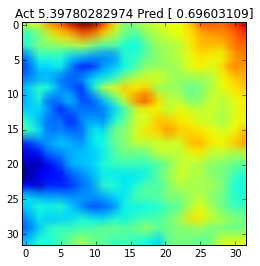

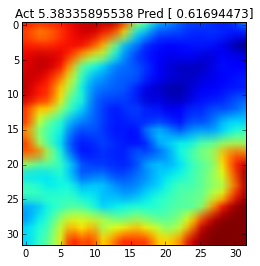

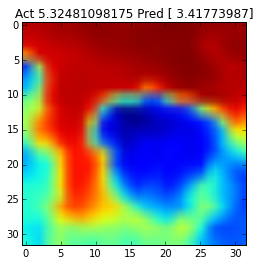

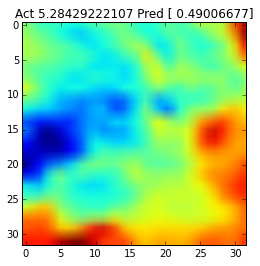

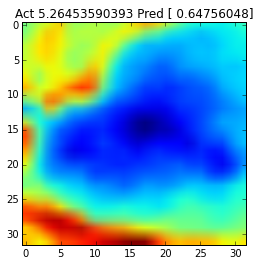

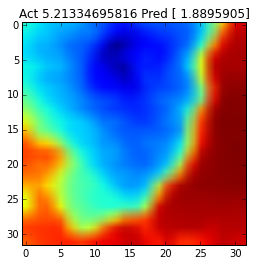

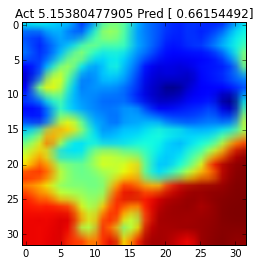

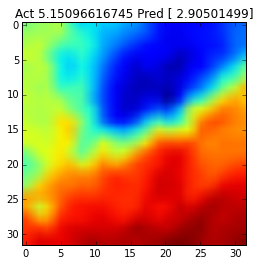

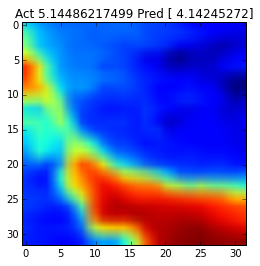

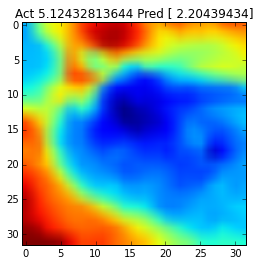

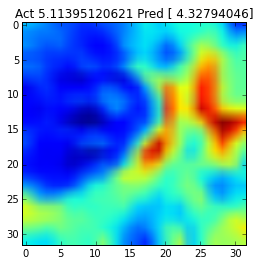

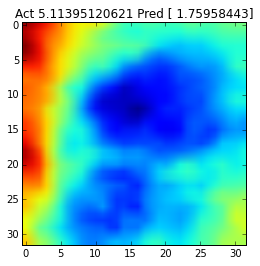

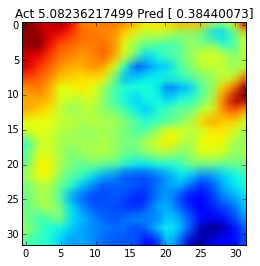

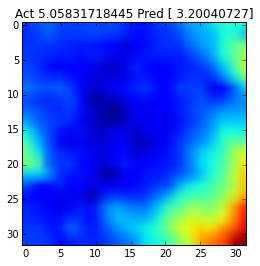

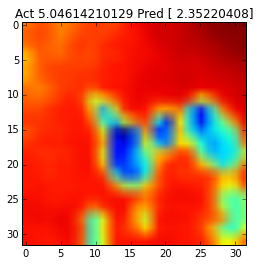

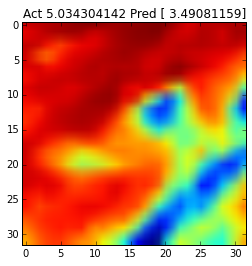

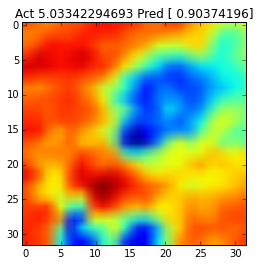

In [198]:
print(len(labels))
for pred in labels[0:20]:
    y, ind = pred
    plt.figure()
    plt.imshow(X2tr[ind].reshape(32, 32, 3))
    plt.title('Act {} Pred {}'.format(y, y_hat[ind]))

In [184]:
preds = list()
for ind, pred in enumerate(y_hat):
    preds.append((pred, ind))

In [187]:
preds.sort(reverse=False)

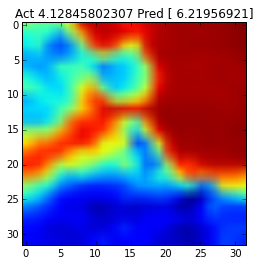

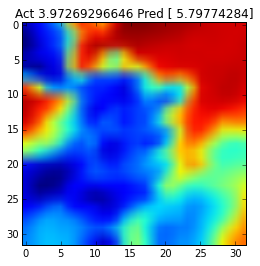

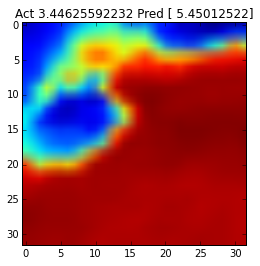

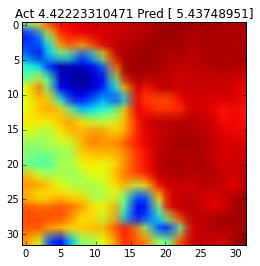

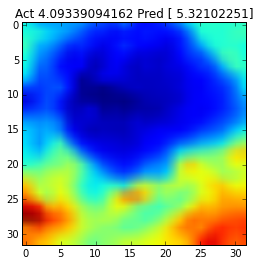

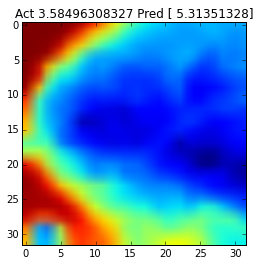

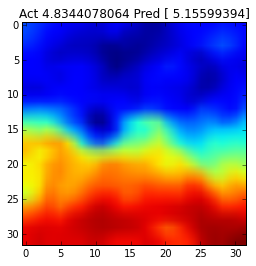

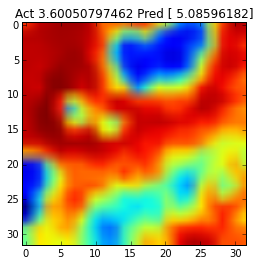

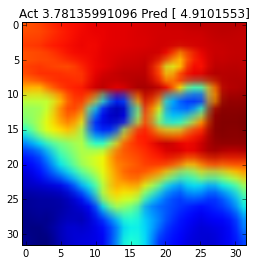

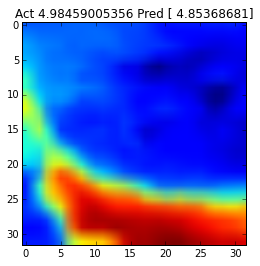

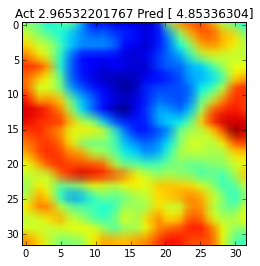

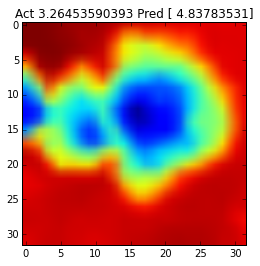

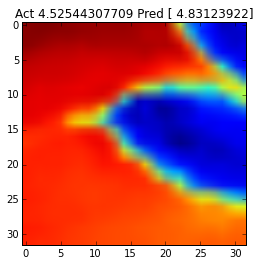

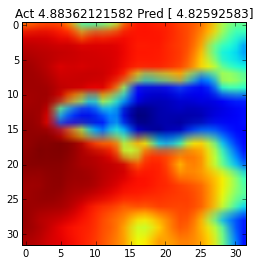

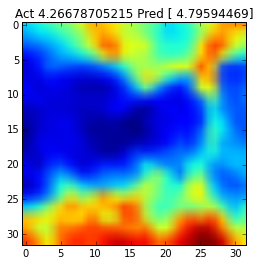

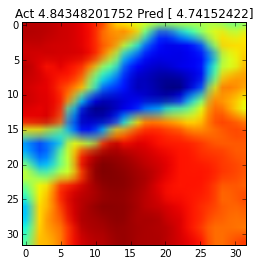

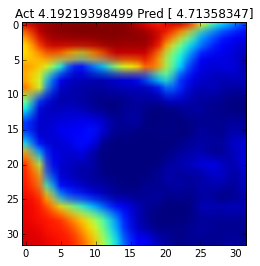

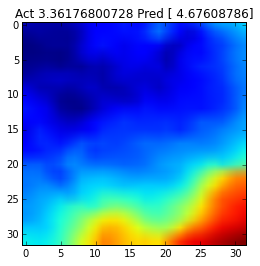

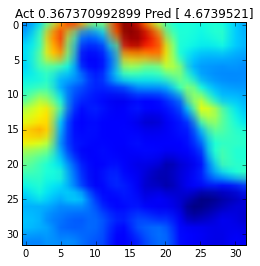

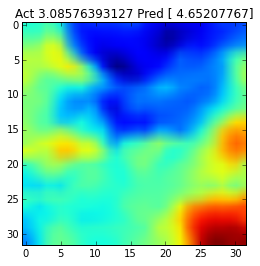

In [186]:
for pred in preds[0:20]:
    y, ind = pred
    plt.figure()
    plt.imshow(X2tr[ind].reshape(32, 32, 3))
    plt.title('Act {} Pred {}'.format(Ytr[ind], y))

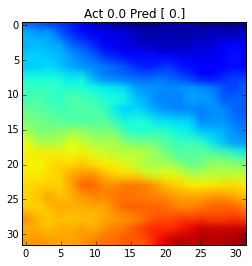

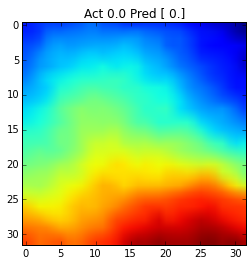

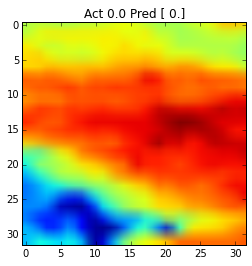

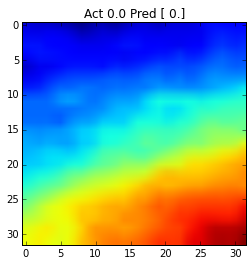

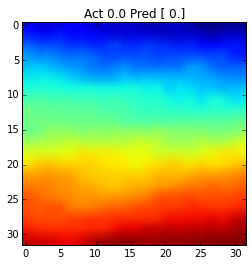

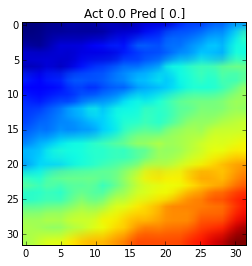

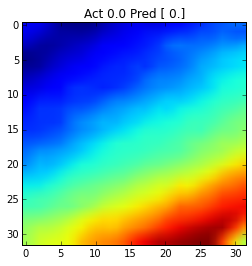

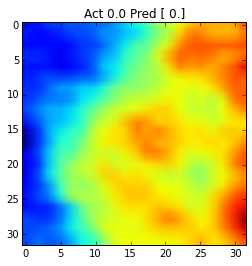

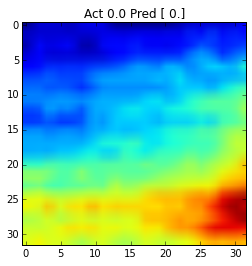

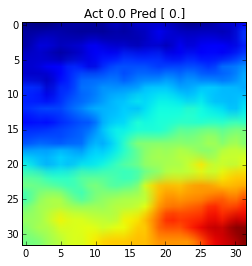

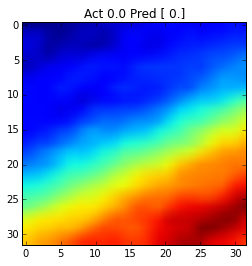

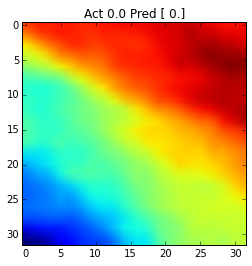

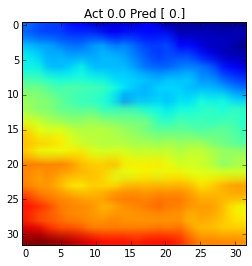

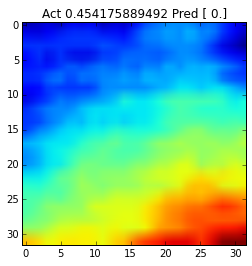

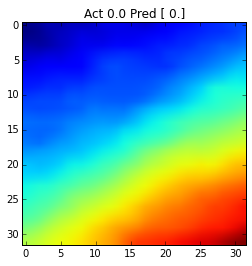

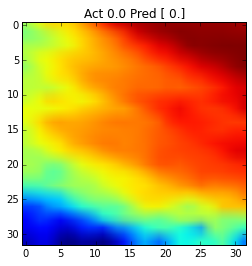

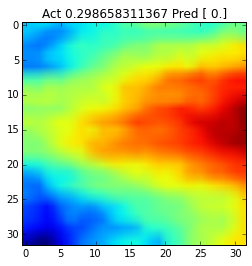

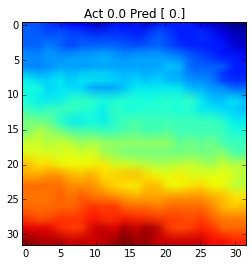

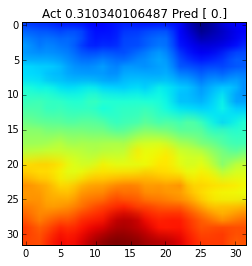

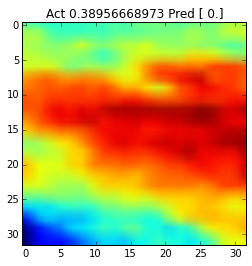

In [188]:
for pred in preds[0:20]:
    y, ind = pred
    plt.figure()
    plt.imshow(X2tr[ind].reshape(32, 32, 3))
    plt.title('Act {} Pred {}'.format(Ytr[ind], y))

In [168]:
y_hat = [x[0] for x in y_hat]

In [199]:
yhat_class = np.asarray([int(round(y)) for y in y_hat]).astype(np.int32)
ytr_class = np.asarray([int(round(y)) for y in Ytr]).astype(np.int32)

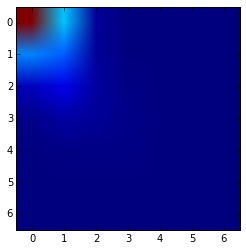

In [200]:
cm = confusion_matrix(ytr_class, yhat_class)
plt.ma(cm)